<a href="https://colab.research.google.com/github/whyeon92/ESAA_YB/blob/mini_project/ESAA_miniproject2_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 데이터 로딩

In [1]:
#구글 코랩 환경 사용으로 드라이브 마운트 및 디렉터리 설정
from google.colab import drive
drive.mount('/content/gdrive/')

path = "/content/gdrive/My Drive/ESAAData/miniproject2 data/"

Mounted at /content/gdrive/


In [ ]:
#라이브러리 임포트
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#경고 메시지 제외
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv(path + "train.csv")
test = pd.read_csv(path + "test.csv")
smpl_sub = pd.read_csv(path + "sample_submission.csv")

# 2. EDA

In [ ]:
#train data의 개형
#index 제외하고 총 13개의 변수
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [ ]:
#test data의 개형
#index를 제외, 총 12개 변수
#train data 중 quality 변수 사라짐
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


In [ ]:
#train data의 열 별 정보
#no null(결측치 없음)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


<Axes: >

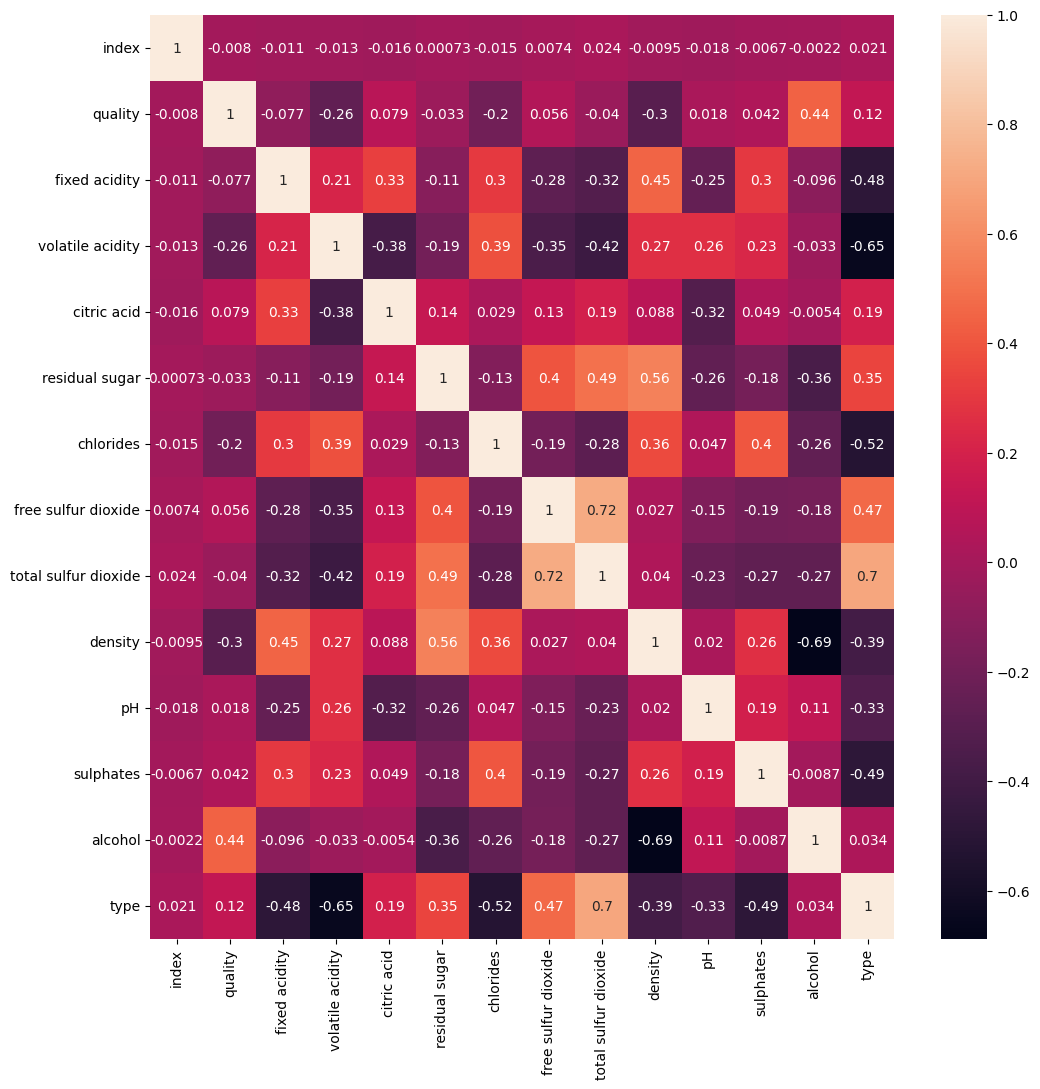

In [ ]:
#train data의 변수 간 상관관계
plt.figure(figsize=(12,12))
sns.heatmap(data=train.corr(), annot = True)

quality변수와 alcol변수 간의 상관관계가 0.44로 높다.

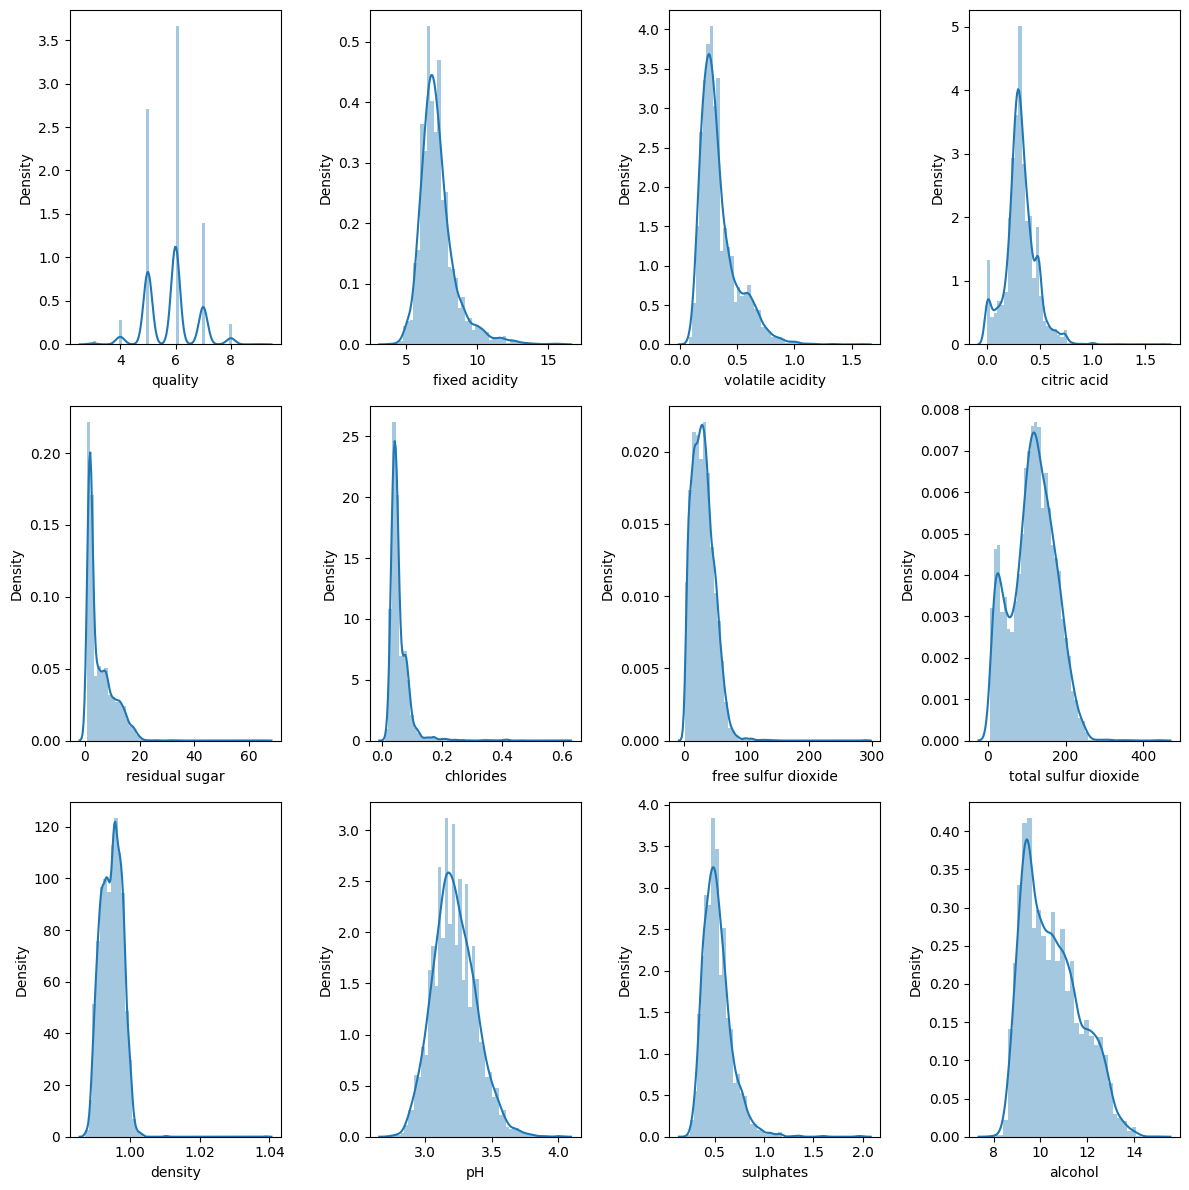

In [ ]:
#train data의 각 변수별 분포
plt.figure(figsize=(12,12))
for i in range(1,13):
    plt.subplot(3,4,i)
    sns.distplot(train.iloc[:,i])
plt.tight_layout()
plt.show()

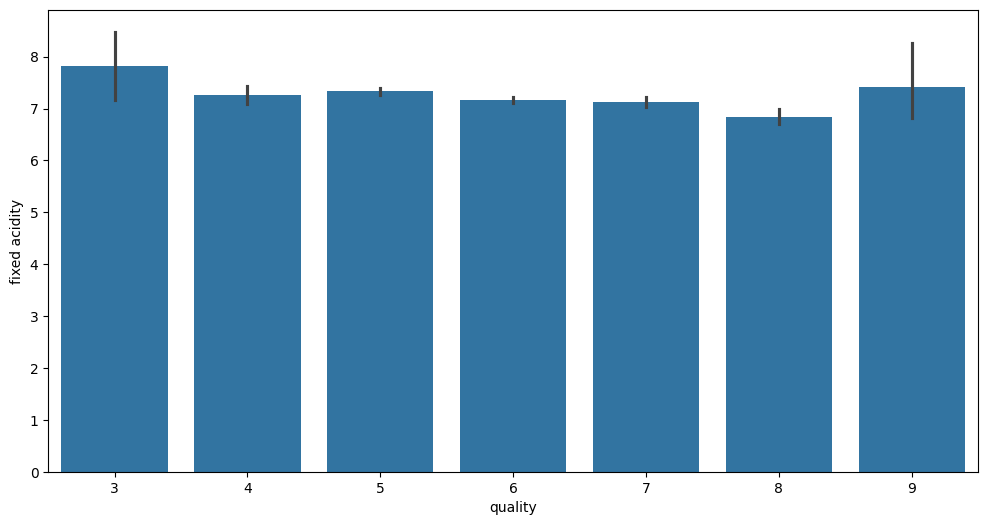

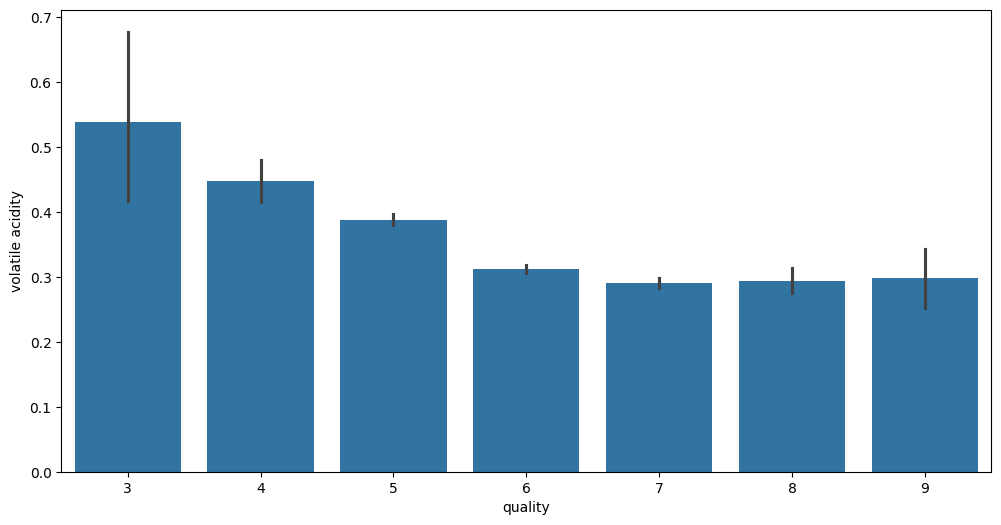

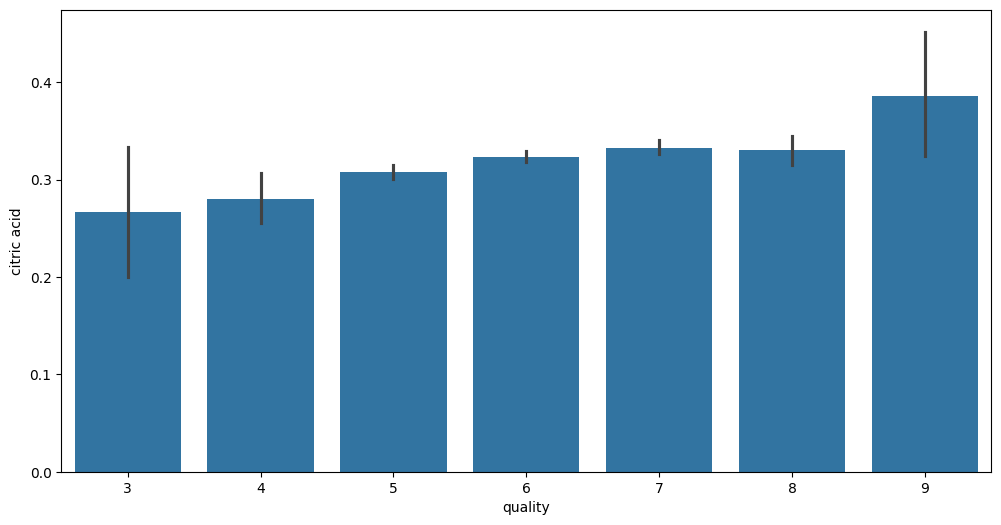

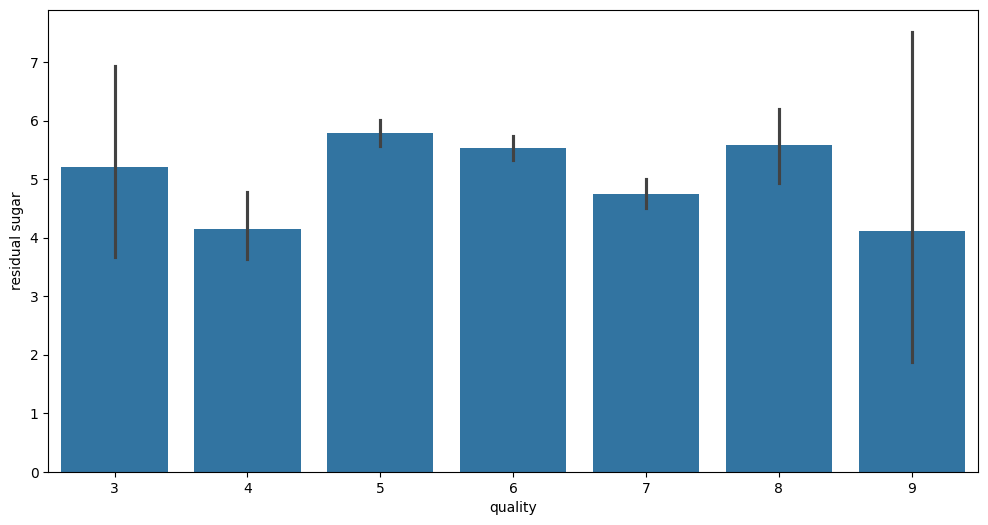

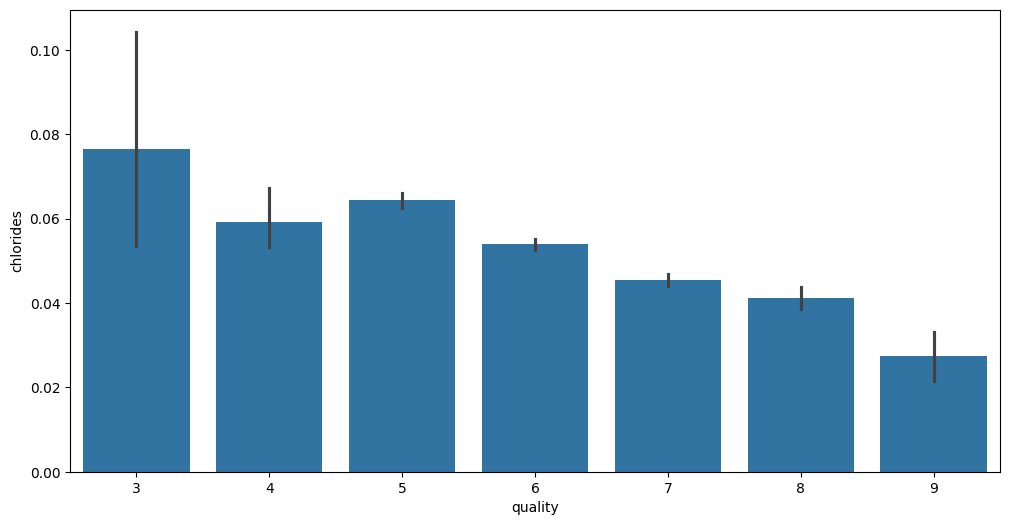

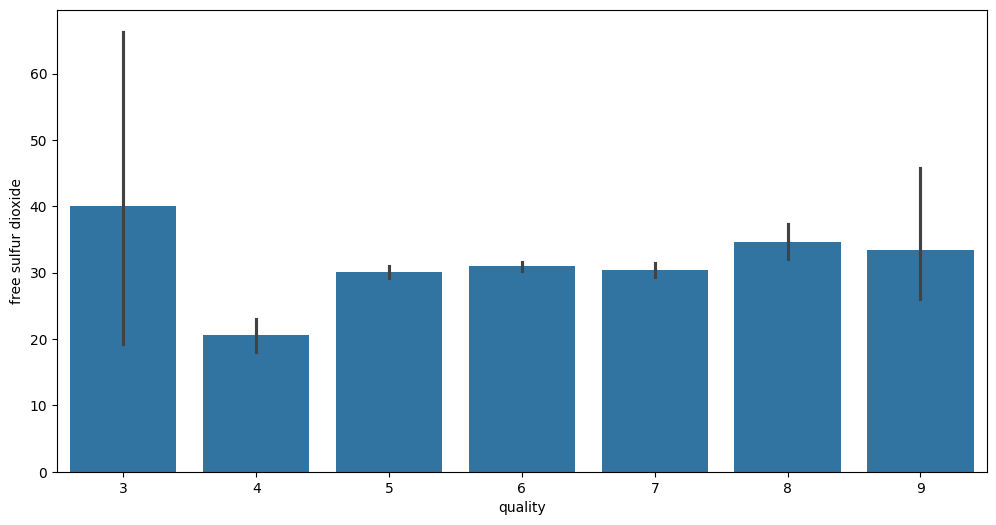

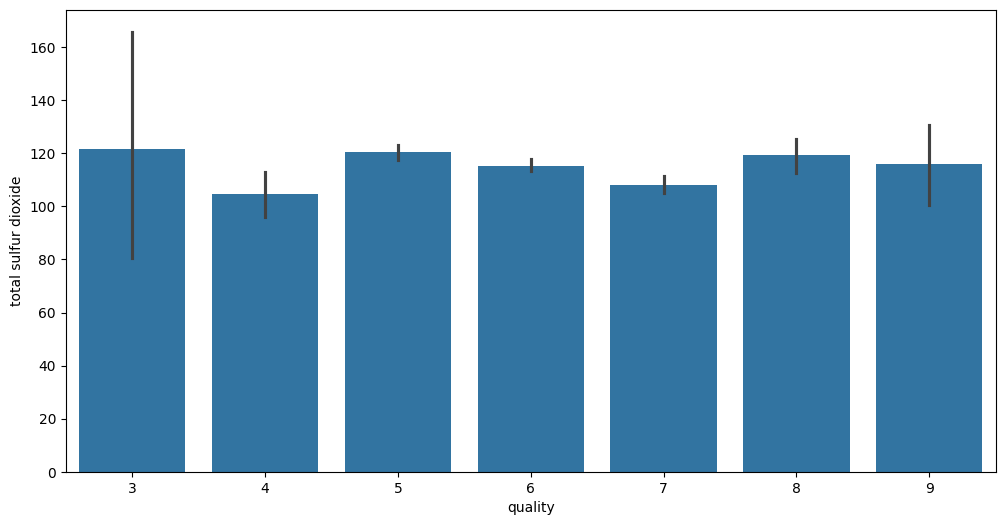

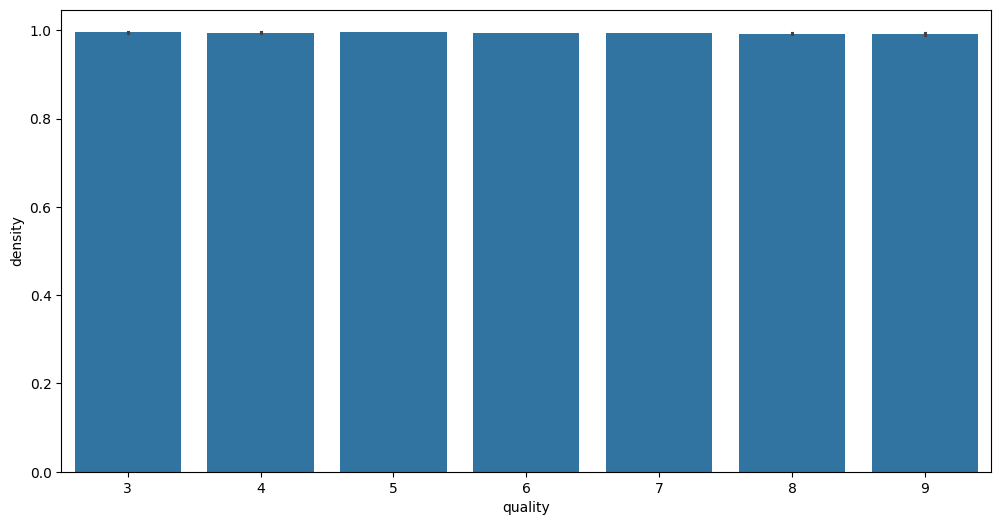

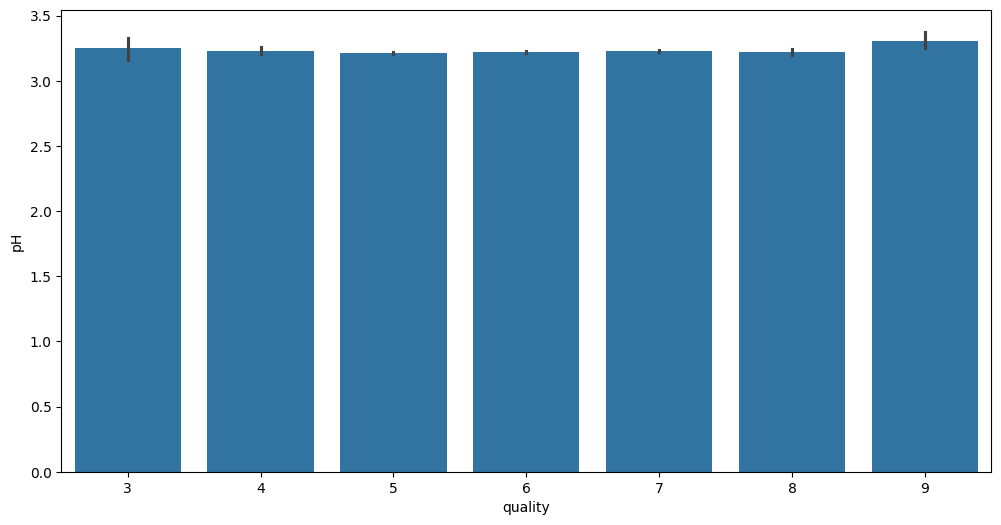

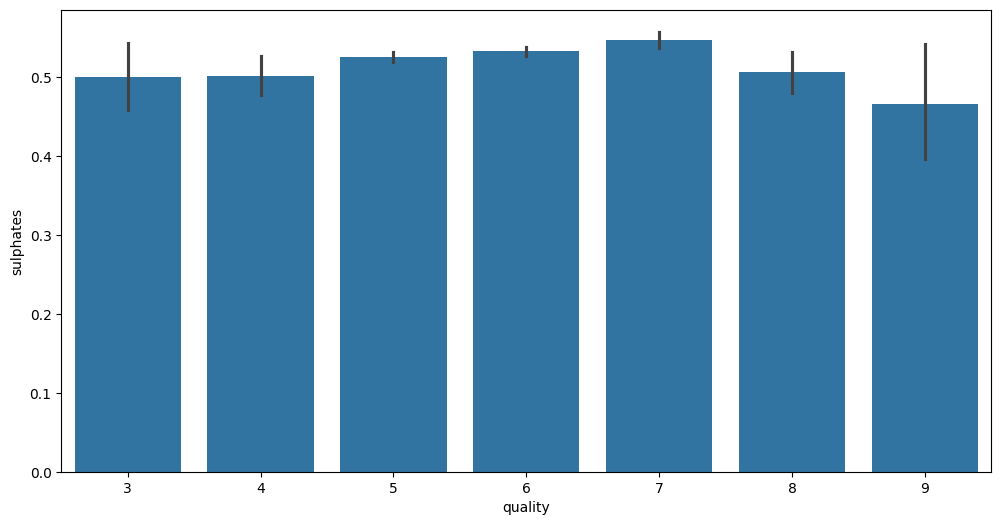

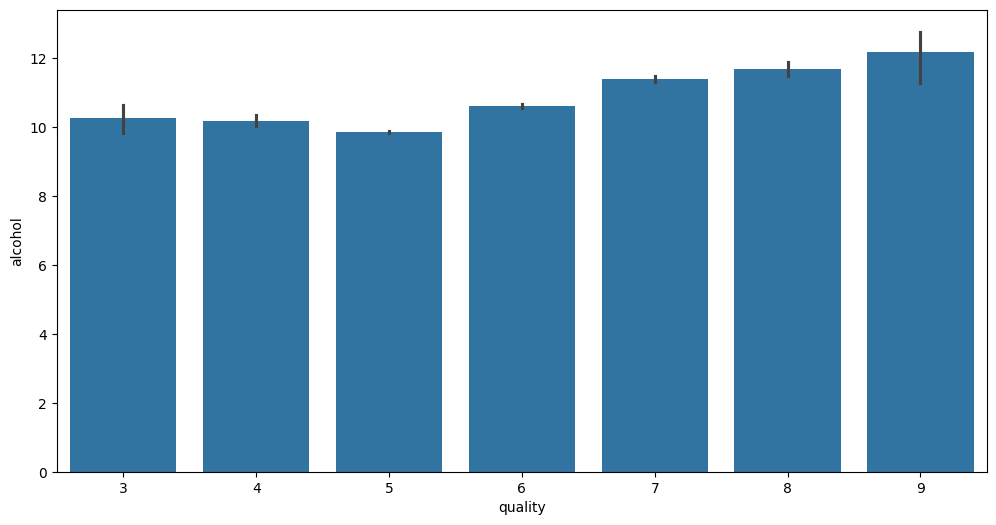

In [ ]:
#train data에서 각 변수와 quality 변수 사이 분포 확인
for i in range(11):
    fig = plt.figure(figsize = (12,6))
    sns.barplot(x = 'quality', y = train.columns[i+2], data = train)

In [ ]:
#type: white&red
#white:1, red:0

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(train['type'])
train['type'] = enc.transform(train['type'])
test['type'] = enc.transform(test['type'])
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,1
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,0
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,1
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,1
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,1


In [ ]:
#불필요한 변수 제거
train_x = train.drop(['index', 'quality'], axis = 1)
train_y = train['quality']
test_x = test.drop('index', axis = 1)

train_x.shape, train_y.shape, test_x.shape

((5497, 12), (5497,), (1000, 12))

In [ ]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,1
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,0
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,1
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,1
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,1


# 3. 데이터 전처리

In [ ]:
train=train.drop('index', axis=1)
test=test.drop('index', axis=1)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quality               5497 non-null   int64  
 1   fixed acidity         5497 non-null   float64
 2   volatile acidity      5497 non-null   float64
 3   citric acid           5497 non-null   float64
 4   residual sugar        5497 non-null   float64
 5   chlorides             5497 non-null   float64
 6   free sulfur dioxide   5497 non-null   float64
 7   total sulfur dioxide  5497 non-null   float64
 8   density               5497 non-null   float64
 9   pH                    5497 non-null   float64
 10  sulphates             5497 non-null   float64
 11  alcohol               5497 non-null   float64
 12  type                  5497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 558.4+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  type                  1000 non-null   object 
dtypes: float64(11), object(1)
memory usage: 93.9+ KB


In [4]:
#범주형 변수 type 원핫 인코딩 처리
train = pd.get_dummies(train, columns = ['type'], prefix = ['type'], dtype = int)
test = pd.get_dummies(test, columns = ['type'], prefix = ['type'], dtype = int)

In [5]:
#train 데이터에서 x, y 분할
train_x = train.drop(['quality'], axis = 1)
train_y = train['quality']

**scaler 필요성 판단**

In [ ]:
train.describe()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_red,type_white
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918,0.243405,0.756595
std,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524,0.429177,0.429177
min,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,0.000000,0.000000
25%,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000,0.000000,1.000000
50%,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000,0.000000,1.000000
75%,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000,0.000000,1.000000
max,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,1.000000,1.000000


앞서 EDA에서 살펴봤던 quality 변수와의 상관관계에서 alcohol이 가장 높았으나, 두 변수 간의 스캐일이 크게 차이나지 않아서 별도의 scale은 진행하지 않았다.

# 4. 결정 트리

## 4-1. 기본 DT 모델

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=13)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=2, random_state=156)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2, random_state=156)

In [ ]:
y_pred_test = dt_clf.predict(test)
sample['quality']=y_pred_test
sample.head()

,index,quality
0,0,6
1,1,5
2,2,6
3,3,6
4,4,6


In [ ]:
from sklearn.metrics import accuracy_score

y_pred_train = dt_clf.predict(X_train)
y_pred_test = dt_clf.predict(X_test)

print('Train 정확도 : ', accuracy_score(y_train, y_pred_train))
print('Test 정확도 :', accuracy_score(y_test, y_pred_test))

Train 정확도 :  0.5324084603138504
Test 정확도 : 0.5136363636363637


## 4-2. GridSearchCV 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [4, 8, 12, 16, 24, 30],
    'min_samples_split': [2, 4, 8, 16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터: ', grid_cv.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
GridSearchCV 최고 정확도 수치: 0.5360
GridSearchCV 최적 하이퍼 파라미터:  {'max_depth': 8, 'min_samples_split': 4}


In [ ]:
best_df_clf = grid_cv.best_estimator_
pred_grid = best_df_clf.predict(test)
sample['quality']=pred_grid
sample.head()

,index,quality
0,0,5
1,1,5
2,2,5
3,3,6
4,4,6


## 4-3. SMOTE 적용 DT 모델

In [ ]:
train_y.value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 4, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(train_x, train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5497, 14) (5497,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (16912, 14) (16912,)
SMOTE 적용 후 레이블 값 분포: 
 quality
5    2416
6    2416
7    2416
8    2416
4    2416
3    2416
9    2416
Name: count, dtype: int64


In [ ]:
params = {
    'max_depth': [4, 8, 12, 16, 24, 30],
    'min_samples_split': [2, 4, 8, 16]
}
dt_smote = DecisionTreeClassifier()
grid_cv_smote = GridSearchCV(dt_smote, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv_smote.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터:\n', grid_cv_smote.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv_smote.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
최적 하이퍼 파라미터:
 {'max_depth': 24, 'min_samples_split': 2}
최고 예측 정확도: 0.7321


In [ ]:
best_df_smote = grid_cv_smote.best_estimator_
pred_smote = best_df_smote.predict(test)
sample['quality']=pred_smote
sample.head()

,index,quality
0,0,3
1,1,6
2,2,6
3,3,5
4,4,6


## 4-4. DT 결과 시각화

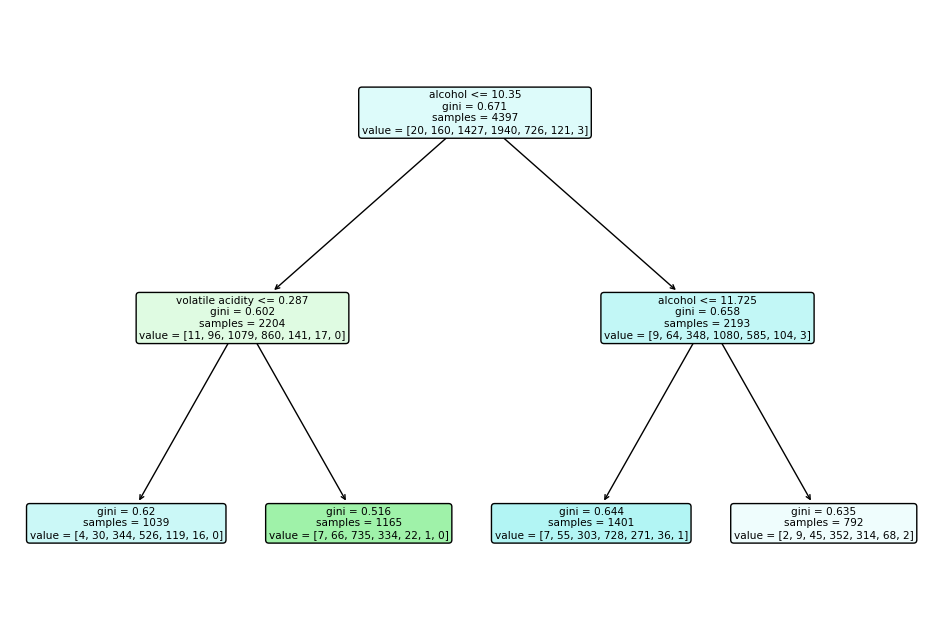

In [ ]:
import matplotlib.pyplot as plt
import sklearn.tree as tree

plt.figure(figsize=(12, 8))
tree.plot_tree(dt_clf, feature_names=X_train.columns,
               rounded=True,
               filled=True
               )
plt.show()

# 5. 랜덤포레스트 모델 생성

## 5-1. 기본 랜덤포레스트 모델

In [6]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state = 0)
rf_clf.fit(train_x, train_y)
pred = rf_clf.predict(test)

In [8]:
smpl_sub['quality'] = pred
smpl_sub.to_csv(path + 'submission_rf.csv', index=False)

## 5-2. GridSearch 하이퍼 파라미터 튜닝

In [9]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[200, 300, 400, 500, 600],
    'max_depth': [8, 12, 16, 24, 30],
    'min_samples_split': [2, 4, 8, 16]
}

rf_grid = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_grid, param_grid = params, cv = 5, n_jobs = -1, refit=True)
grid_cv.fit(train_x, train_y)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 500}
최고 예측 정확도: 0.6687


In [10]:
pred_grid_rf = grid_cv.predict(test)
pred_grid_rf

array([6, 5, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 7, 6, 6, 5, 6, 6, 6, 5, 6, 6,
       5, 7, 6, 5, 5, 5, 6, 5, 7, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5,
       6, 6, 5, 6, 4, 6, 5, 5, 6, 4, 5, 6, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6,
       5, 5, 6, 5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 6, 6, 7, 5,
       6, 6, 6, 5, 5, 6, 6, 7, 7, 6, 6, 5, 6, 7, 5, 5, 6, 6, 6, 7, 5, 5,
       6, 5, 5, 6, 6, 7, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 7, 6, 6, 8, 6, 5,
       6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 5, 6, 6, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5,
       5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 7,
       6, 6, 6, 6, 7, 6, 6, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6, 6, 7, 6, 6,
       6, 6, 7, 6, 6, 6, 6, 7, 5, 6, 6, 7, 6, 6, 6, 7, 6, 6, 7, 6, 5, 7,
       5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 7, 5, 6, 6, 6, 6, 5, 7, 7,
       5, 6, 6, 6, 5, 5, 5, 6, 5, 7, 8, 6, 5, 7, 6,

In [11]:
smpl_sub['quality'] = pred_grid_rf
smpl_sub.to_csv(path + 'submission_rf_grid.csv', index=False)

## 5-3. SMOTE 데이터 모델 생성

In [12]:
train_y.value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

레이블 불균형 -> SMOTE 적용

In [13]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 4, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(train_x, train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5497, 14) (5497,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (16912, 14) (16912,)
SMOTE 적용 후 레이블 값 분포: 
 quality
5    2416
6    2416
7    2416
8    2416
4    2416
3    2416
9    2416
Name: count, dtype: int64


In [16]:
params = {
    'n_estimators':[200, 300, 400, 500, 600],
    'max_depth': [8, 12, 16, 24, 30],
    'min_samples_split': [2, 4, 8, 16]
}

rf_smote = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_smote = GridSearchCV(rf_smote, param_grid = params, cv = 5, n_jobs = -1, refit=True)
grid_smote.fit(X_train_over, y_train_over)

print('최적 하이퍼 파라미터:\n', grid_smote.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_smote.best_score_))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


최적 하이퍼 파라미터:
 {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 300}
최고 예측 정확도: 0.8266


In [17]:
pred_smote = grid_smote.predict(test)

In [18]:
smpl_sub['quality'] = pred_smote
smpl_sub.to_csv(path + 'submission_rf_smote.csv', index=False)

# 6. XGBClassifier

## 6-1. 모델 fitting

In [ ]:
!pip install xgboost

In [ ]:
import xgboost
myxgb=xgboost.XGBClassifier()

In [ ]:
myxgb.fit(train_x, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
y_pred = myxgb.predict(test)+3 ## 위에서 뺀 3을 다시 더한다.
smpl_sub['quality']=y_pred
smpl_sub.head()

,index,quality
0,0,5
1,1,5
2,2,5
3,3,5
4,4,6


csv로 파일 내보내기

In [ ]:
smpl_sub.to_csv('xgb_pred.csv', index=False)

## 6-2. GridSearchCV로 최적 파라미터 찾기

cf. learning rate는 XGBoost의 hyperparameter(tuning parameter) 중 하나이다. 즉, learning rate를 변화시키면서 최적의 모델을 찾기 위한 과정이 필요하다. 일반적으로 learning rate의 값은 0.1, 0.05, 0.01, 0.001을 이용한다.

cf. XGBoost 주요 파라미터
* general parameter : 거의 수정하지 않음
 * booster : gbtree(tree based model), gblinear(linear model). default='gbtree'
 * silent : 출력 메시지 나타내고 싶지 않으면 1(default)
 * nthread : CPU 실행 스레드 개수 조정. default=전체 다 사용
* booster parameter : 튜닝
  * eta(0.3) : 학습률(learning rate). 범위는 0 ~ 1로 클수록 모형의 업데이트 속도가 빨라짐. 클수록 과적합 가능성이 높음
  * num_boost_around(10) : 학습 시 활용될 weak learner 반복 수
  * min_child_weight(1) : leaf node에 포함되는 최소 관측치의 수. 범위는 0에서 무한대로 작은 값일수록 과적합 가능성이 높음.
  * gamma(0) : leaf node의 추가 분할을 결정할 최소 손실 감소값. 해당 값보다 손실이 크게 감소할 때 분리. 범위는 0에서 무한대로 값이 클수록 과적합 감소.
  * max_depth(6) : 트리의 최대 깊이 설정. 0을 지정하면 깊이 제한 없음. 과적합에 가장 민감하게 작용하는 파라미터 중 하나임.
  * sub_sample(1) : 학습 시 데이터 샘플링 비율 지정(과적합 제어). 일반적으로 0.5 ~ 1 사이의 값 사용
  * colsample_bytree(1) : 트리 생성에 필요한 feature의 샘플링에 사용. feature가 많을 때 과적합 조절에 사용. 범위는 0 ~ 1
  * lambda(1) : L2 Regularization 적용 값. feature의 개수가 많을 때 적용 검토. 클수록 과적합 감소 효과.
  * alpha(0) : L1 Regularization 적용 값. feature의 개수가 많을 때 적용 검토. 클수록 과적합 감소 효과.
  * scale_pos_weight(1) : 불균형 데이터셋의 균형 유지
* train parameter : objective, eval_metric

In [ ]:
myxgb=xgboost.XGBClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
xgb_param_grid={
    'max_depth' : [2, 3, 4, 5, 6], 'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.001, 0.01, 0.05, 0.1], 'gamma' : [0.1, 0.5, 1, 2]
}
xgb_grid=GridSearchCV(myxgb, param_grid = xgb_param_grid, n_jobs=-1, verbose = 1, error_score="raise")
xgb_grid.fit(train_x, train_y)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5, 1, 2],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
print("GridSearchCV 최고 정확도: {0:.4f}".format(xgb_grid.best_score_))
print("GridSearchCV 최적 파라미터:", xgb_grid.best_params_)

GridSearchCV 최고 정확도: 0.6518
GridSearchCV 최적 파라미터: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


In [ ]:
best_xgb=xgb_grid.best_estimator_

In [ ]:
y_pred = best_xgb.predict(test)+3 ## 위에서 뺀 3을 다시 더한다.
smpl_sub['quality']=y_pred
smpl_sub.head()

,index,quality
0,0,5
1,1,6
2,2,5
3,3,5
4,4,6


csv로 파일 내보내기

In [ ]:
smpl_sub.to_csv('xgb_grid_pred.csv', index=False)

## 6-3. SMOTE 오버 샘플링 후 GridsearchCV로 최적 파라미터 찾기

**target 데이터 확인**

In [ ]:
train_y.value_counts()

quality
3    2416
2    1788
4     924
1     186
5     152
0      26
6       5
Name: count, dtype: int64

레이블 불균형이 존재하므로 SMOTE로 오버샘플링을 한다.

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors = 4, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(train_x, train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5497, 13) (5497,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (16912, 13) (16912,)
SMOTE 적용 후 레이블 값 분포: 
 quality
2    2416
3    2416
4    2416
5    2416
1    2416
0    2416
6    2416
Name: count, dtype: int64


SMOTE한 train 데이터로 다시 GridsearchCV를 실행하여 최적 파라미터를 찾는다.

In [ ]:
import xgboost
myxgb_smote=xgboost.XGBClassifier()

from sklearn.model_selection import GridSearchCV
xgb_param_grid={
    'max_depth' : [2, 3, 4, 5, 6], 'n_estimators' : [50, 100, 200],
    'learning_rate' : [0.001, 0.01, 0.05, 0.1], 'gamma' : [0.1, 0.5, 1, 2]
}
xgb_grid_smote=GridSearchCV(myxgb_smote, param_grid = xgb_param_grid, n_jobs=-1, verbose = 1, error_score="raise")
xgb_grid_smote.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(error_score='raise',
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     lear...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.1, 0.5, 1, 2],
                         'learning_rate': [0.001, 0.01, 0.05, 0.1],
                         'max_depth': [2, 3, 4, 5, 6],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
print("최고 정확도: {0:.4f}".format(xgb_grid_smote.best_score_))
print("최적 파라미터:", xgb_grid_smote.best_params_)

최고 정확도: 0.8636
최적 파라미터: {'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}


전보다 정확도가 상승한다.

In [ ]:
best_xgb=xgb_grid_smote.best_estimator_

In [ ]:
y_pred = best_xgb.predict(test)+3 ## 위에서 뺀 3을 다시 더한다.
smpl_sub['quality']=y_pred
smpl_sub.head()

,index,quality
0,0,5
1,1,6
2,2,5
3,3,6
4,4,6


csv 파일로 내보내기

In [ ]:
smpl_sub.to_csv('xgb_smote_grid_pred.csv', index=False)

# 7. LightGBM

## 7-1. GridSearchCV

In [ ]:
# 데이터 split
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, shuffle = True,
                                                    test_size = 0.2, random_state=156)

# 모델 생성
from lightgbm import LGBMClassifier
lgbm_clf = LGBMClassifier(objective='multiclass', metric='multi_logloss', verbosity=-1)

# 모델 학습
params = {'n_estimators': [80, 90, 100, 110, 120],
          'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
          'reg_alpha': [0.88, 0.9, 0.92]}

gridcv = GridSearchCV(lgbm_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1, error_score='raise')
gridcv.fit(X_train, y_train, eval_metric='logloss', eval_set=[(X_train, y_train), (X_test, y_test)])
print("GridSearchCV 최고 정확도: {0:.4f}".format(gridcv.best_score_))
print("GridSearchCV 최적 파라미터:", gridcv.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
GridSearchCV 최고 정확도: 0.6382
GridSearchCV 최적 파라미터: {'learning_rate': 0.1, 'n_estimators': 110, 'reg_alpha': 0.88}


In [ ]:
# 최적 파라미터 대입
from sklearn.metrics import accuracy_score
lgbm_wrapper = LGBMClassifier(learning_rate=0.1, n_estimators=110, reg_alpha=0.88, objective='multiclass', metric='multi_logloss', verbosity=-1)

lgbm_wrapper.fit(X_train, y_train, eval_metric='logloss',
                eval_set=[(X_train, y_train), (X_test, y_test)])
predictions = lgbm_wrapper.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'예측 정확도: {accuracy:.4f}')

예측 정확도: 0.6755


test 데이터 예측

In [ ]:
# 제출 파일 생성
sub = lgbm_wrapper.predict(test)
submission = pd.read_csv('/content/sample_submission.csv')
submission['quality']= sub
submission.head()

,index,quality
0,0,5
1,1,5
2,2,6
3,3,5
4,4,6


In [ ]:
# csv 파일로 저장
submission.to_csv('submission_LGBM_grid.csv', index=False)

## 7-2. SMOTE 데이터 모델 생성

In [ ]:
train_y.value_counts()

quality
6    2416
5    1788
7     924
4     186
8     152
3      26
9       5
Name: count, dtype: int64

레이블 불균형 -> SMOTE 적용

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors = 4, random_state = 0)
X_train_over, y_train_over = smote.fit_resample(train_x, train_y)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', train_x.shape, train_y.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (5497, 13) (5497,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (16912, 13) (16912,)
SMOTE 적용 후 레이블 값 분포: 
 quality
5    2416
6    2416
7    2416
8    2416
4    2416
3    2416
9    2416
Name: count, dtype: int64


In [ ]:
# 모델 생성
from lightgbm import LGBMClassifier
lgbm_smote = LGBMClassifier(objective='multiclass', metric='multi_logloss', verbosity=-1)

# 모델 학습
params = {'n_estimators': [80, 90, 100, 110, 120],
          'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.12],
          'reg_alpha': [0.88, 0.9, 0.92]}

gridcv_smote = GridSearchCV(lgbm_smote, param_grid=params, scoring='accuracy', cv=5, verbose=1, error_score='raise')
gridcv_smote.fit(X_train_over, y_train_over, eval_metric='logloss')
print("GridSearchCV 최고 정확도: {0:.4f}".format(gridcv_smote.best_score_))
print("GridSearchCV 최적 파라미터:", gridcv_smote.best_params_)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
GridSearchCV 최고 정확도: 0.8790
GridSearchCV 최적 파라미터: {'learning_rate': 0.12, 'n_estimators': 120, 'reg_alpha': 0.9}


In [ ]:
# 최적 파라미터 대입
from sklearn.metrics import accuracy_score
lgbm_wrapper_smote = LGBMClassifier(learning_rate=0.12, n_estimators=120, reg_alpha=0.9, objective='multiclass', metric='multi_logloss', verbosity=-1)

lgbm_wrapper_smote.fit(X_train_over, y_train_over, eval_metric='logloss')
predictions = lgbm_wrapper_smote.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(f'예측 정확도: {accuracy:.4f}')

예측 정확도: 0.9545


test 데이터 예측

In [ ]:
# 제출 파일 생성
sub = lgbm_wrapper_smote.predict(test)
submission = pd.read_csv('/content/sample_submission.csv')
submission['quality']= sub
submission.head()

,index,quality
0,0,5
1,1,6
2,2,5
3,3,5
4,4,7


In [ ]:
# csv 파일로 저장
submission.to_csv('submission_LGBM_smote.csv', index=False)